In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()

df = pd.read_csv('ze_final.csv')

In [17]:
df = df[df['centro'] == 'CCAAB']


**Perfil dos Estudantes na Amostra**

- 59% evadiram
- 78% possuem cidade de origem diferente da cidade do campus
- 55% são do sexo feminino
- Idade média dos estudantes é 23

In [18]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['event'].value_counts(normalize=True))

1    0.596679
0    0.403321
Name: event, dtype: float64


In [47]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())


1    0.788885
0    0.211115
Name: is_outra_cidade, dtype: float64
0    0.557547
1    0.442453
Name: sexo, dtype: float64
23.05639592239395


**Para alunos de cursos noturnos: cidade de origem impacta a evasão?**

- Taxa de evasão é maior para estudantes cuja cuja cidade de origem difere daquela do campus (58% vs 54%)
- Número médio de reprovações é maior para discentes cuja cidade de origem é igual à cidade do campus. Por quê?

In [20]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max')) & (df['turno'] == 'Noturno')

pd.crosstab(df[idx].event, df[idx].is_outra_cidade, normalize='columns')

is_outra_cidade         0         1
event                              
0                0.456612  0.419795
1                0.543388  0.580205

In [21]:
idx = df.time > 1

students = df[idx].groupby('matricula').agg({'n_rep' : 'mean', 'n_repf': 'mean', 'n_tra' : 'mean', 'n_apr' : 'mean'}).reset_index()

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

foo = pd.merge(df.loc[idx, ['matricula', 'turno', 'event', 'is_outra_cidade']], students, on='matricula')

idx= foo.turno == 'Noturno'

foo[idx].groupby('is_outra_cidade').agg({'n_repf' : 'mean', 'n_rep' : 'mean', 'n_tra' : 'mean'})

n_repf     n_rep     n_tra
is_outra_cidade                              
0                0.302083  0.858542  0.225000
1                0.240712  0.707430  0.203431

**Taxa de evasão é maior para estudantes cuja origem difere da cidade do campus?**

- Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (60% vs 58%)

   is_outra_cidade  event    percent
0                0      1  57.866044
1                0      0  42.133956
2                1      1  60.150063
3                1      0  39.849937


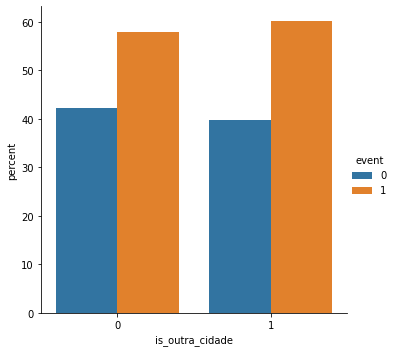

In [24]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event')

**Taxa de evasão é maior para ingressantes no 1o semestre?**

- Evasão é maior entre ingressantes no 2o semestre (64% vs 56%)

1    0.571029
2    0.428971
Name: semestreIngresso, dtype: float64


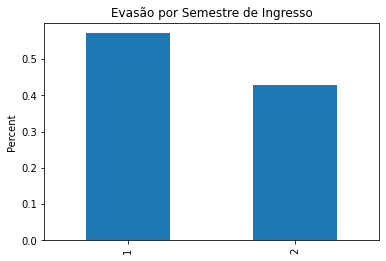

In [25]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')
counts = df.loc[idx, 'semestreIngresso'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre de Ingresso')
plt.show()


1    0.571029
2    0.428971
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  56.291391
1                 1      0  43.708609
2                 2      1  64.162514
3                 2      0  35.837486


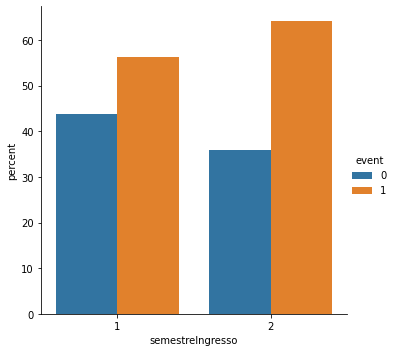

In [26]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event')

**Taxa de evasão no 2o semestre letivo é maior?**

- Evasão é maior no 2o semestre letivo (65% vs 53%). Por quê? O SISU pode ser uma linha de investigação.

2    0.540645
1    0.459355
Name: semestreLetivo, dtype: float64


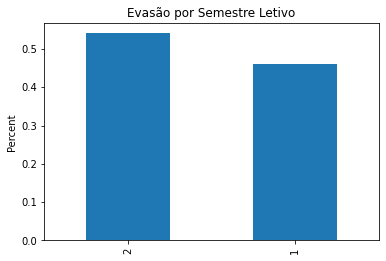

In [27]:
idx = df['event'] == 1

counts = df.loc[idx, 'semestreLetivo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre Letivo')
plt.show()


1    0.508385
2    0.491615
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  53.913325
1               1      0  46.086675
2               2      1  65.618729
3               2      0  34.381271


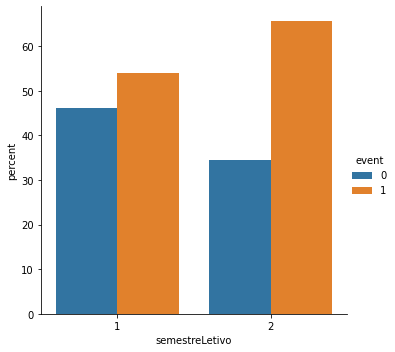

In [28]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event')

**Há interação entre evasão e o sexo do estudante?**

- A evasão é maior entre os homens (62% vs 57%). Por quê?
- A taxa de evasão entre mulheres possui uma queda mais acentuada ao longo do tempo.

0    0.535134
1    0.464866
Name: sexo, dtype: float64


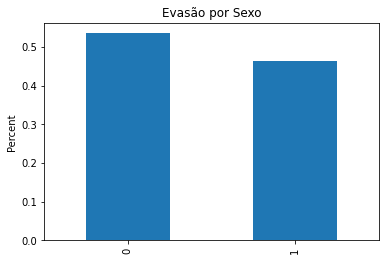

In [29]:
idx = df['event'] == 1

counts = df.loc[idx, 'sexo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Sexo')
plt.show()

0    0.557547
1    0.442453
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  57.269242
1     0      0  42.730758
2     1      1  62.690450
3     1      0  37.309550


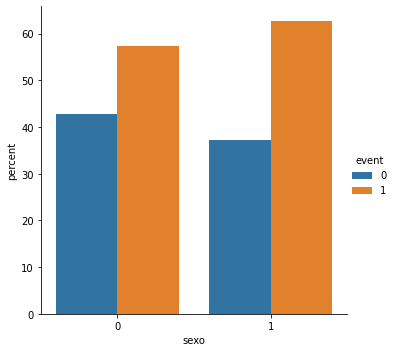

In [30]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event')

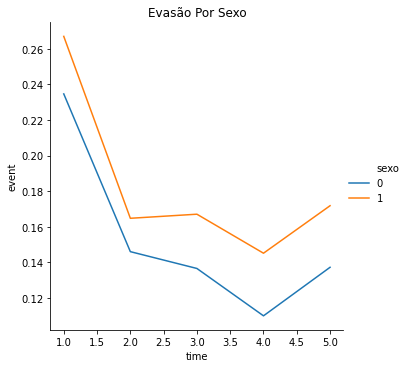

In [93]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

**Como se comporta a taxa de evasão com o tempo?**

- A taxa de evasão tende a decrescer com o tempo

[Text(0.5, 1.0, 'Evasão Geral')]

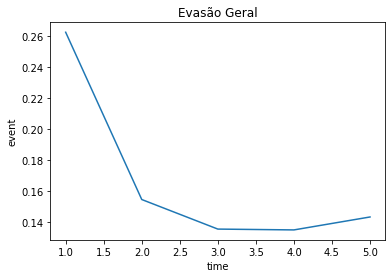

In [35]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

**Há diferenças entre cota e ampla concorrência?**

- Não há evidências de diferença entre cotistas e ampla concorrência (58% vs 60%)
- A taxa de evasão de cotistas possui uma queda mais acentuada ao longo do tempo

0    0.514633
1    0.485367
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  60.607029
1           0      0  39.392971
2           1      1  58.672087
3           1      0  41.327913


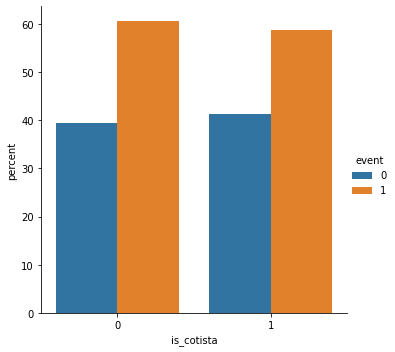

In [31]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event')

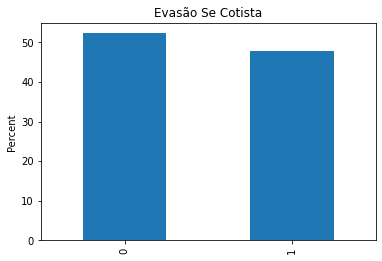

In [41]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_cotista'].value_counts(normalize=True).mul(100).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Se Cotista')
plt.show()

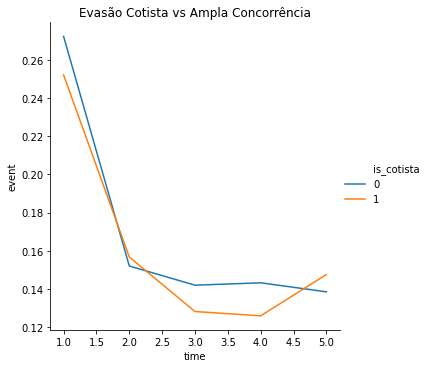

In [42]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência')    

**A idade de ingresso afeta a taxa de evasão?**

- Evasão tende tende a ser maior para estudantes entre 30 e 50 anos. Por quê? Necessidade de trabalhar?

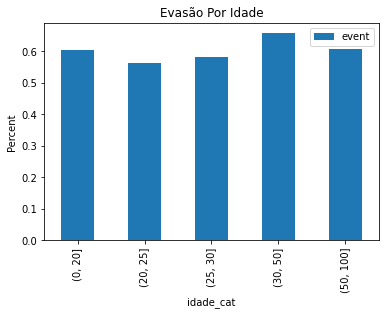

In [46]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade')
plt.show()

**Gap (tempo entre o término do ensino médio e o ingresso no curso) afeta a evasão?**

- O Gap não parece influenciar evasão

(0.0, 1.0]      0.297757
(1.0, 2.0]      0.189497
(10.0, 49.0]    0.124405
(2.0, 3.0]      0.113868
(3.0, 4.0]      0.073419
(4.0, 5.0]      0.047417
(5.0, 6.0]      0.046057
(6.0, 7.0]      0.033311
(7.0, 8.0]      0.028892
(8.0, 9.0]      0.025493
(9.0, 10.0]     0.019884
Name: gap_cat, dtype: float64


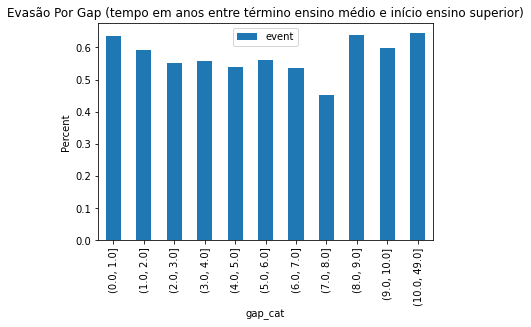

In [48]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)')
plt.show()